<a href="https://colab.research.google.com/github/Ashlinsairahbiju/Ashlinsairahbiju/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U dataprep
!pip install kneed
!pip install plotly==5.14.1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from sklearn.neighbors import LocalOutlierFactor
from itertools import product

import warnings

%matplotlib inline




In [10]:
data = pd.read_csv("/content/Country-data.csv")

In [11]:
df = pd.DataFrame(data)
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

Computing series-max-agg-ad0f172f5cfec84f38686f5128f6e8cb:   0%|          | 0/1874 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


DataPrep Report
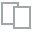
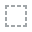
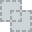
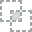
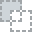
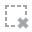
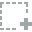
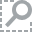
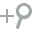
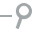
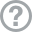
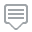
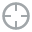
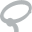
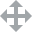
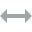
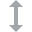
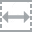
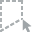
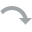
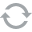
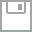
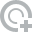
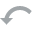
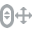
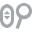
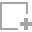
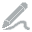
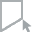
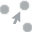
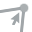
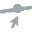

In [12]:
create_report(df)

In [13]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [14]:
# remove outliers
df = df[df['child_mort']<170]
df = df[df['exports']<105]
df = df[df['health']<12]
df = df[df['imports']<109]
df = df[df['income']<91800]
df = df[df['inflation']<27]
df = df[df['total_fer']<7]
df = df[df['gdpp']<60000]
df = df[df['life_expec']>50]

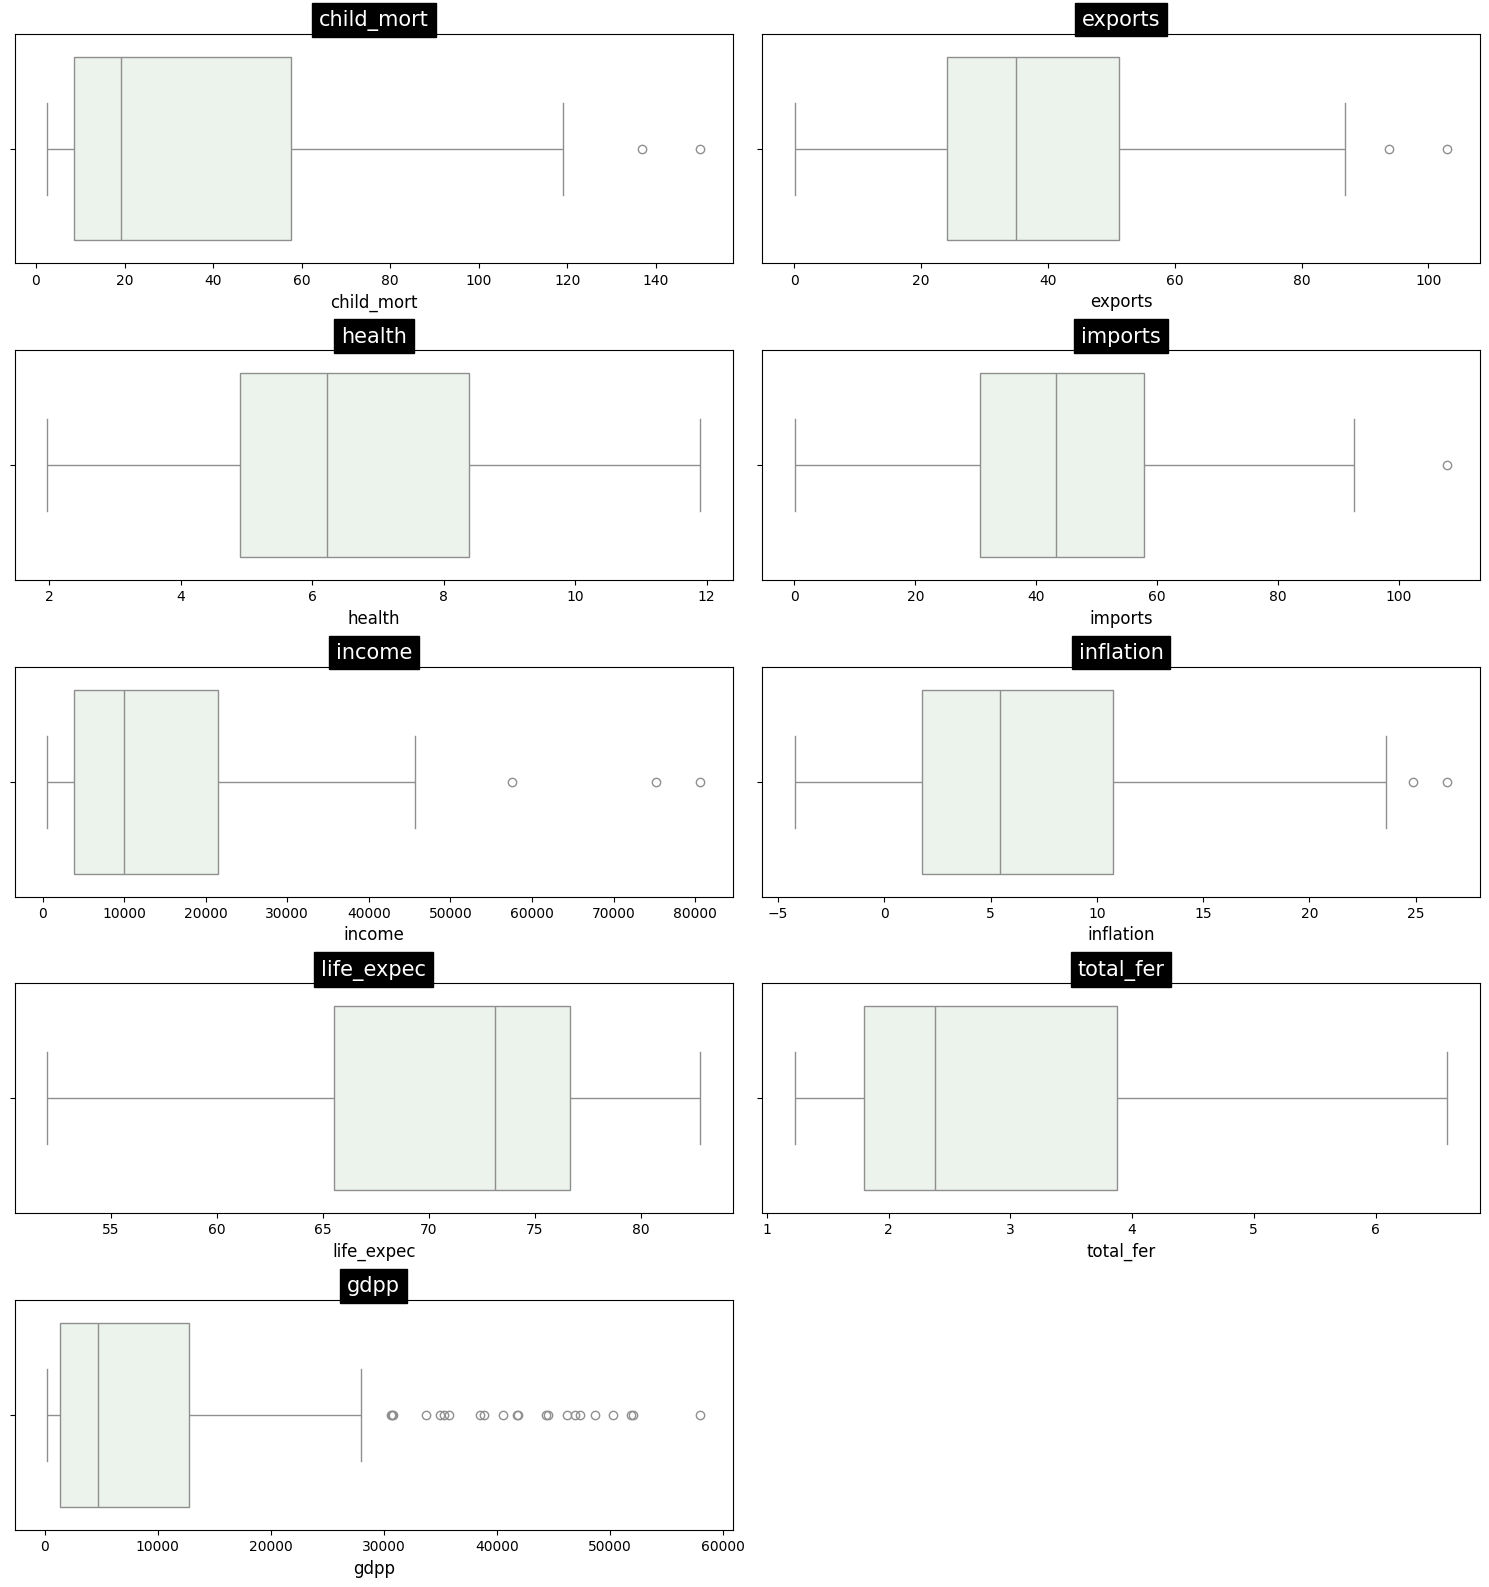

In [15]:
Numerical = df.drop("country", axis = 1)
sns.set_palette("light:g")
plt.figure(figsize = (15,25))
for idx, i in enumerate(Numerical):
    plt.subplot(8, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

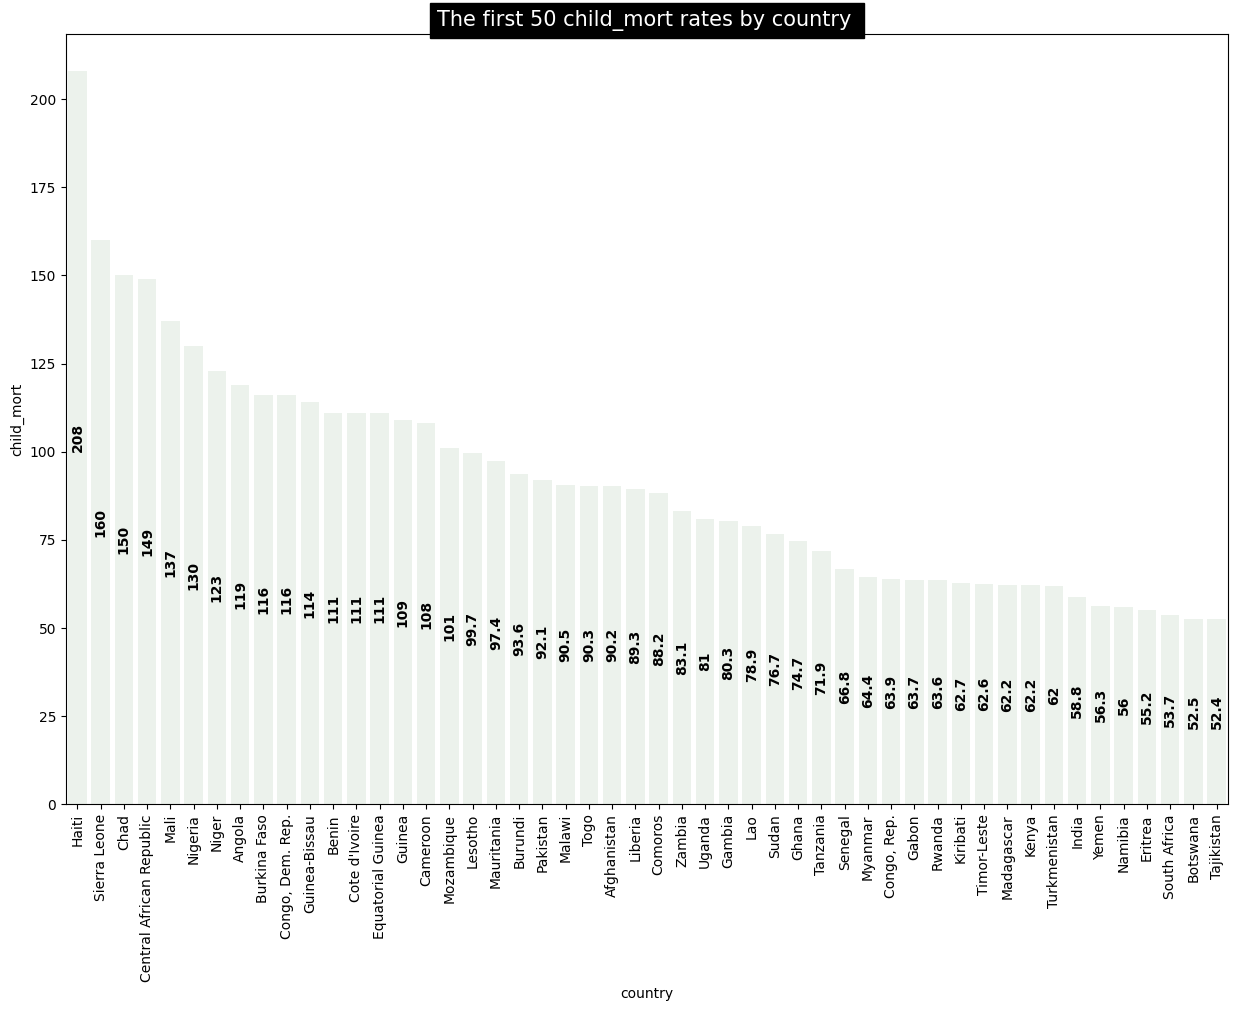

In [16]:
plt.figure(figsize=(15,10)) #size
plt.title('The first 50 child_mort rates by country ',backgroundcolor = 'Black', color='white',fontsize=15) #title
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:50]);
plt.xticks(rotation=90) # ticks
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,fontweight='bold',color='black',label_type='center', rotation=90)
plt.show()

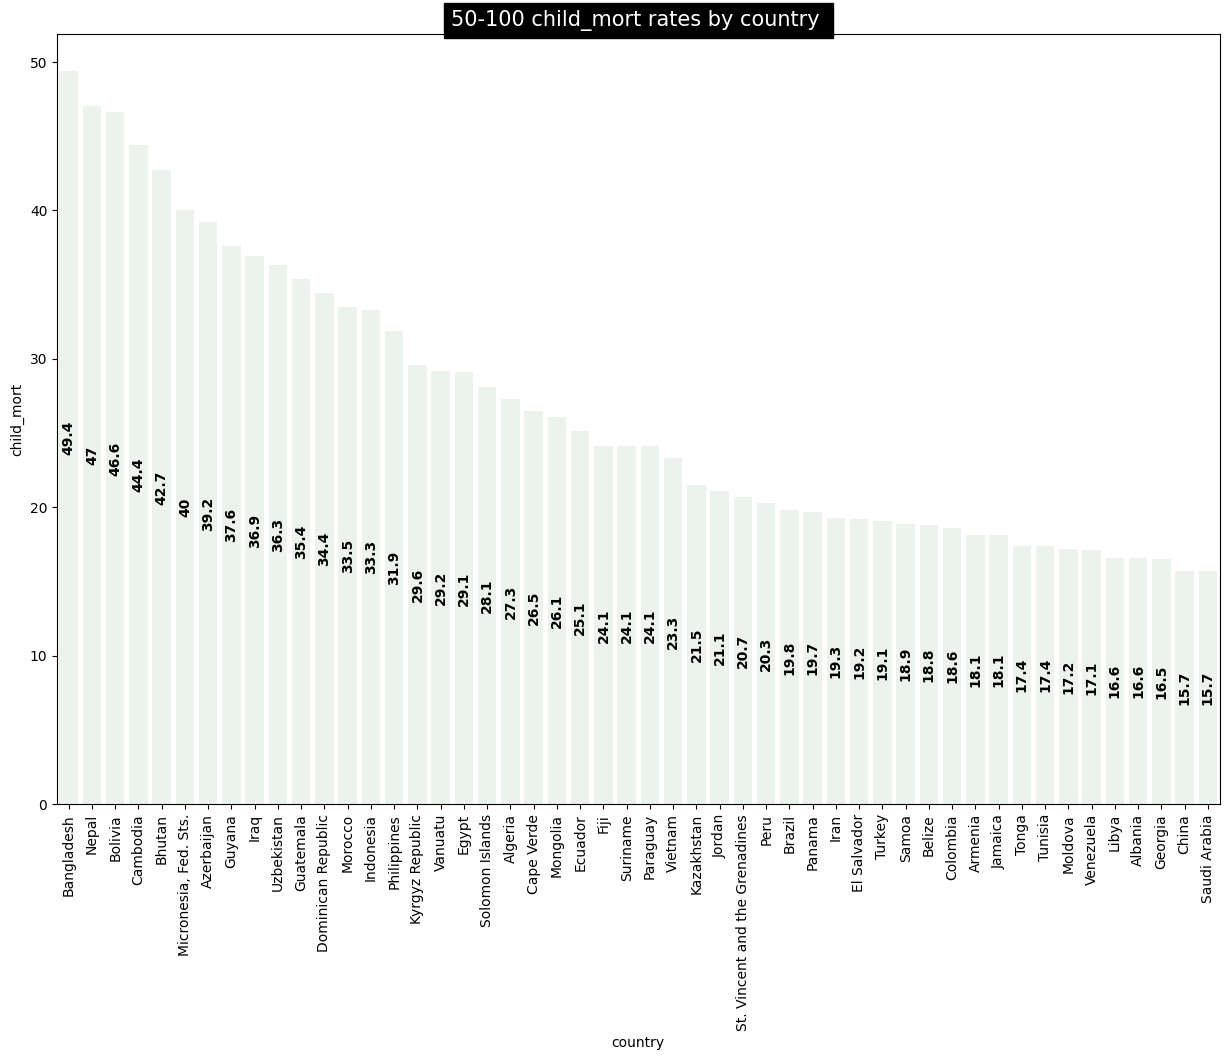

In [17]:
plt.figure(figsize=(15,10)) #size
plt.title('50-100 child_mort rates by country ',backgroundcolor = 'Black', color='white',fontsize=15) #title
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[50:100]);
plt.xticks(rotation=90) # ticks

for i in ax.containers:
    i.datavalues
    ax.bar_label(i,fontweight='bold',color='black',label_type='center', rotation=90)
plt.show()

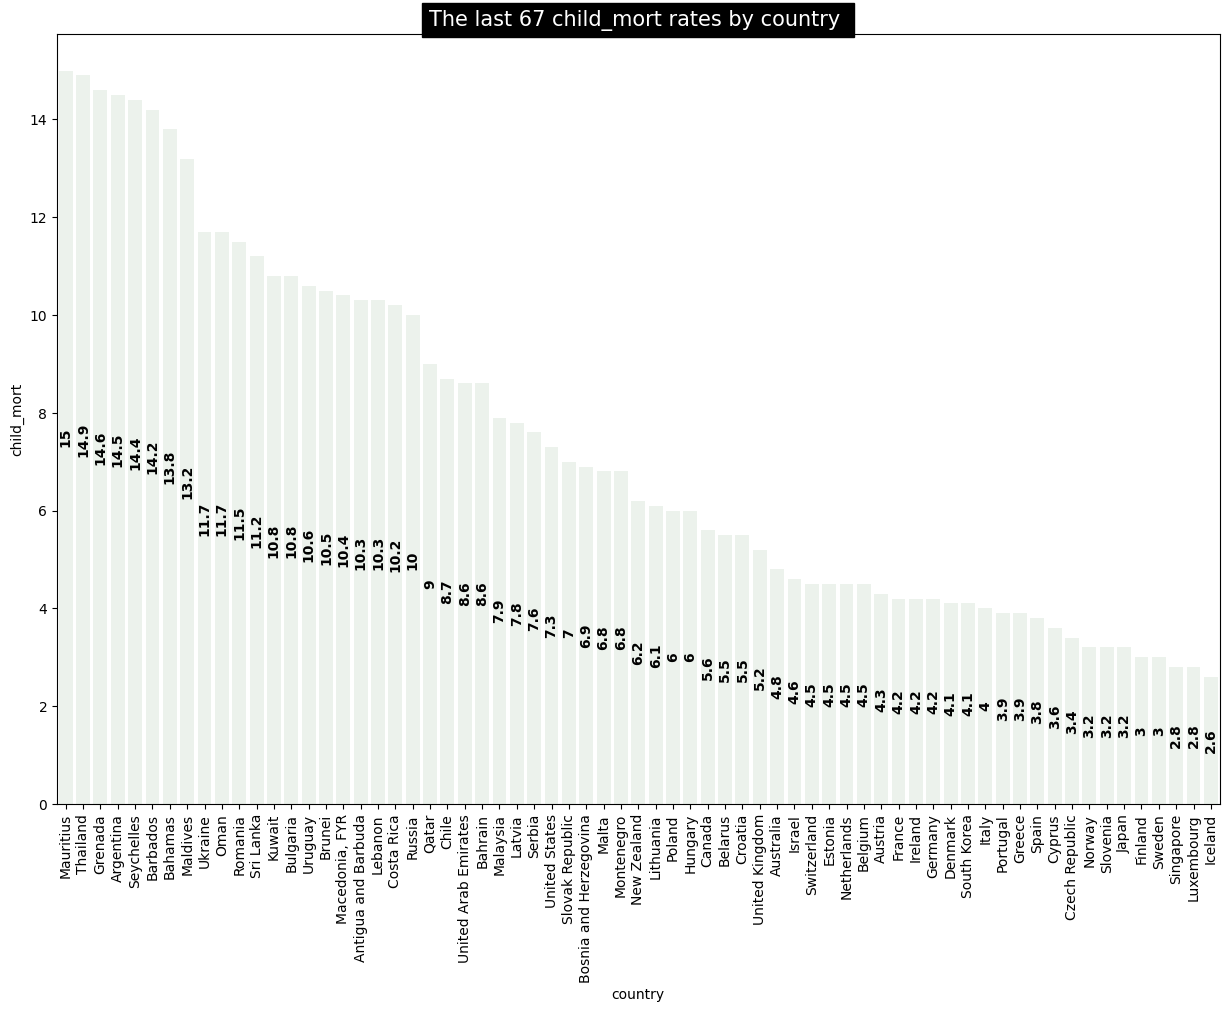

In [18]:
plt.figure(figsize=(15,10)) #size
plt.title('The last 67 child_mort rates by country ',backgroundcolor = 'Black', color='white',fontsize=15) #title
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[100:]);
plt.xticks(rotation=90) # ticks

for i in ax.containers:
    i.datavalues
    ax.bar_label(i,fontweight='bold',color='black',label_type='center', rotation=90)
plt.show()

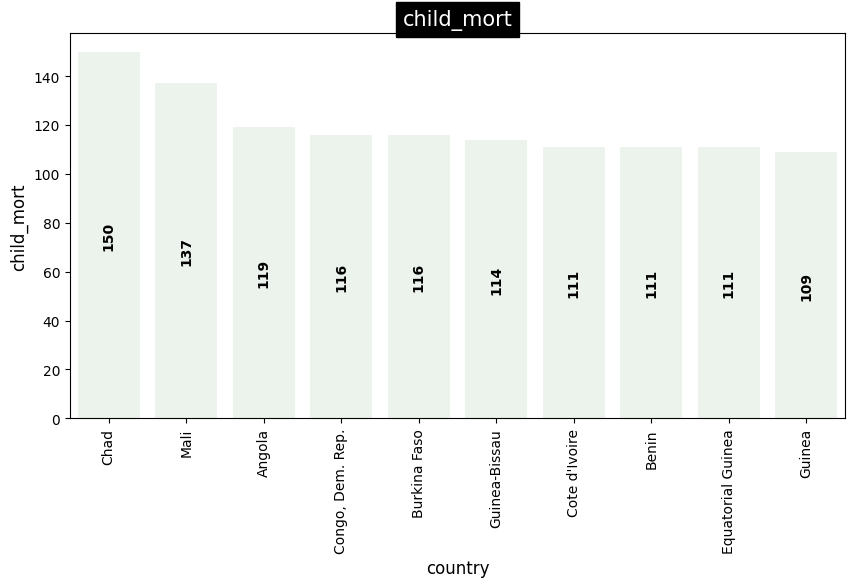

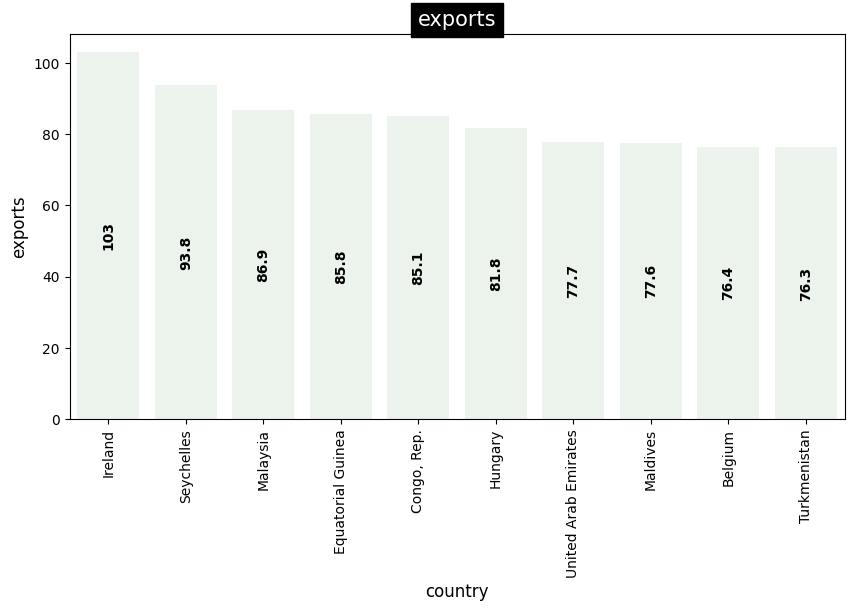

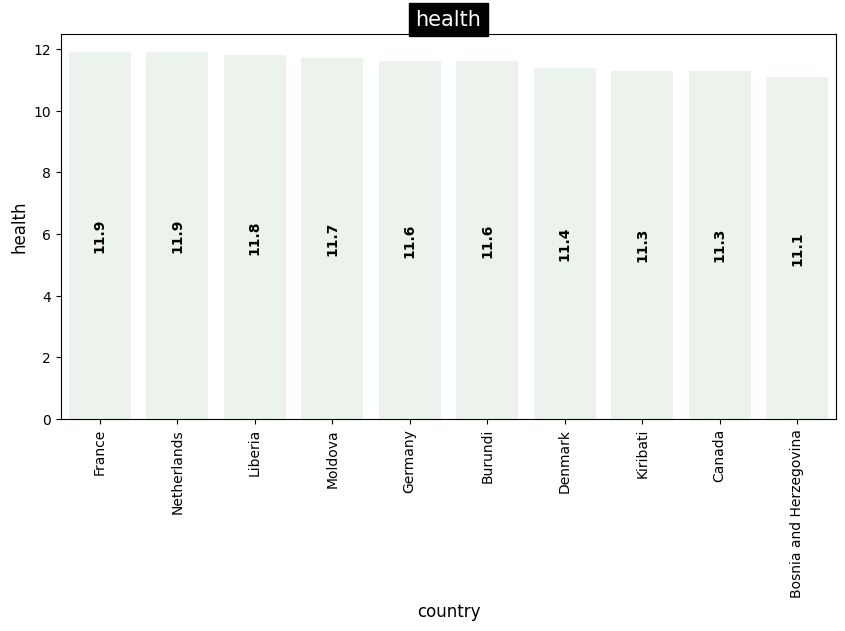

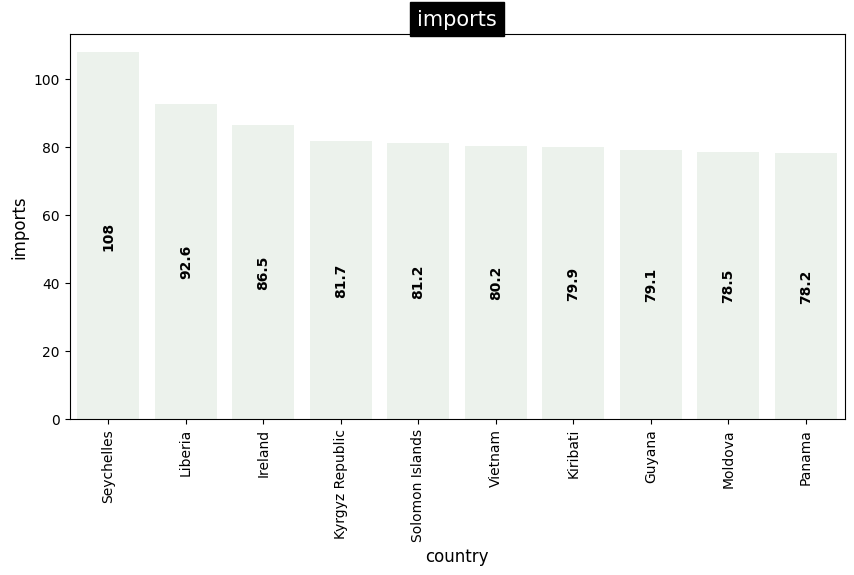

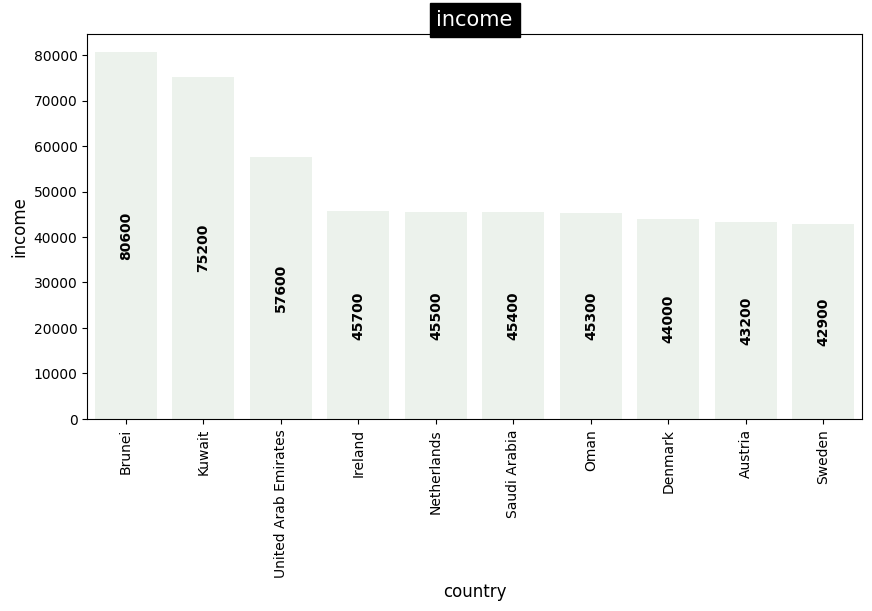

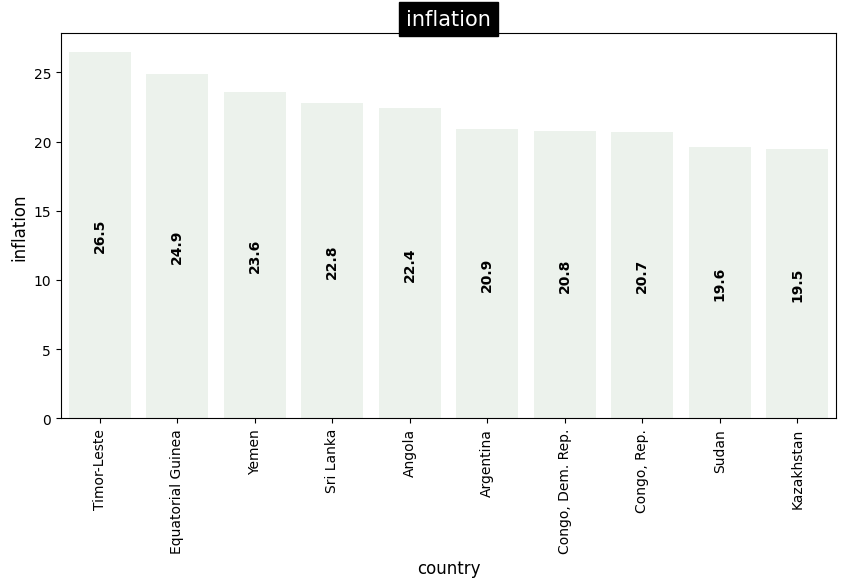

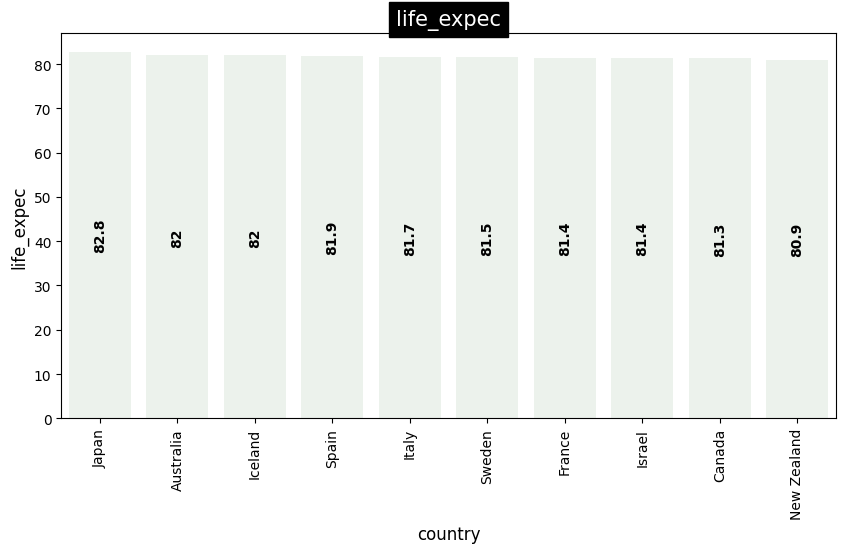

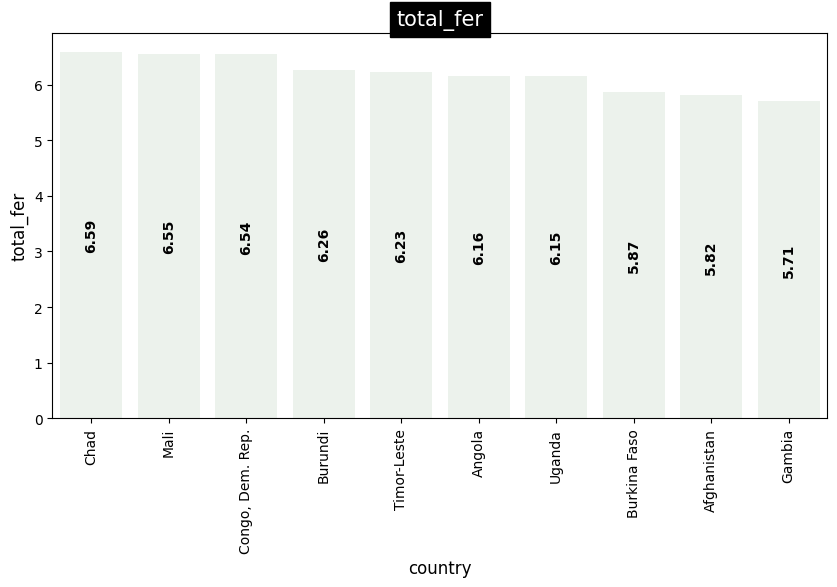

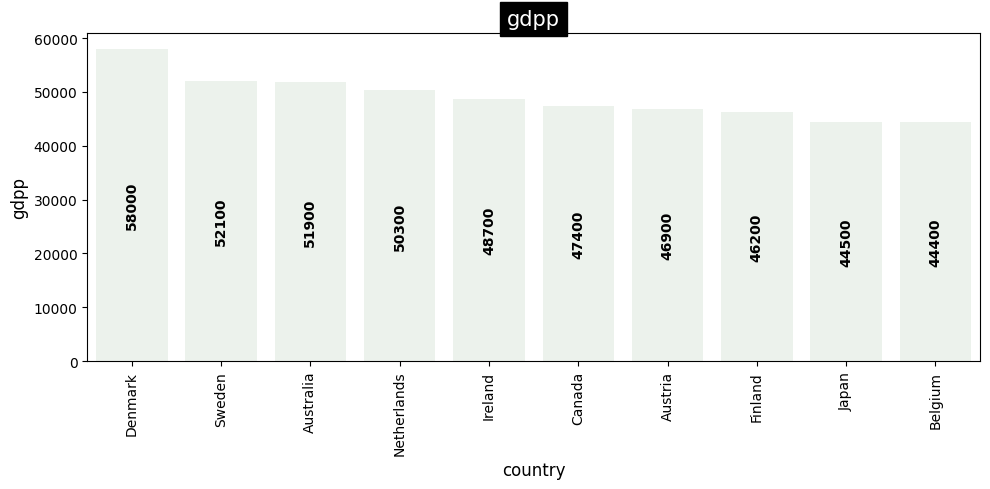

In [19]:
# first 10
numerical_name=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer' , 'gdpp']

for i in numerical_name :
    plt.figure(figsize=(10,5))
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel('country', size = 12)
    plt.ylabel(i, size = 12)
    ax=sns.barplot(x = 'country',y = i, data = df.sort_values(ascending = False,by = i).iloc[:10])
    plt.xticks(rotation=90) # ticks
    for i in ax.containers:
        i.datavalues
        ax.bar_label(i,fontweight='bold',color='black',label_type='center', rotation=90)

plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

plt.show()

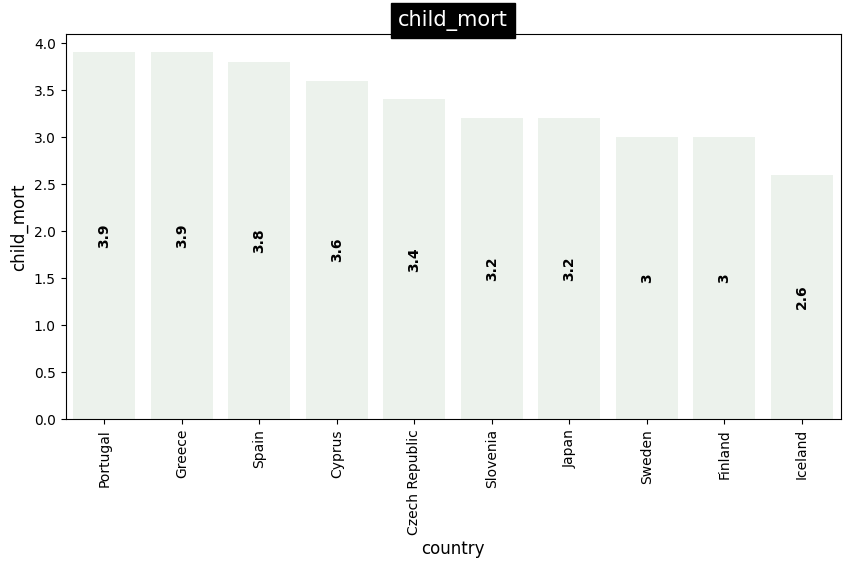

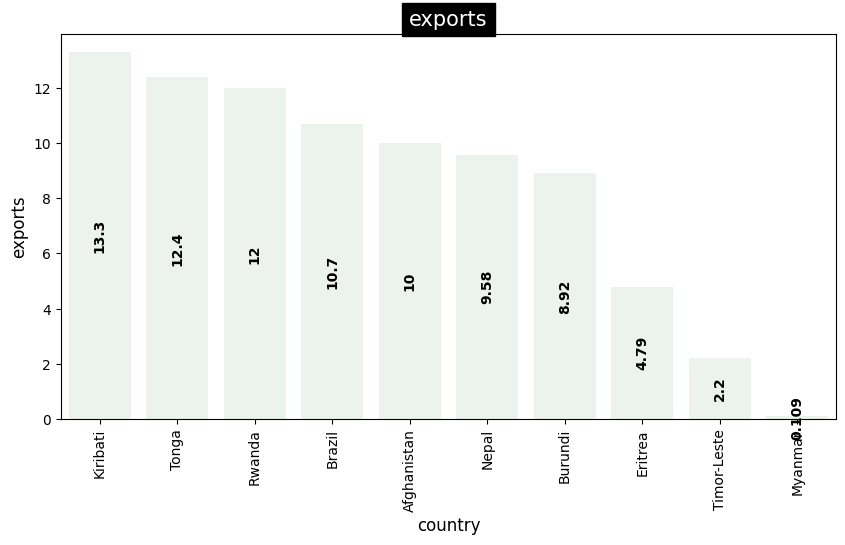

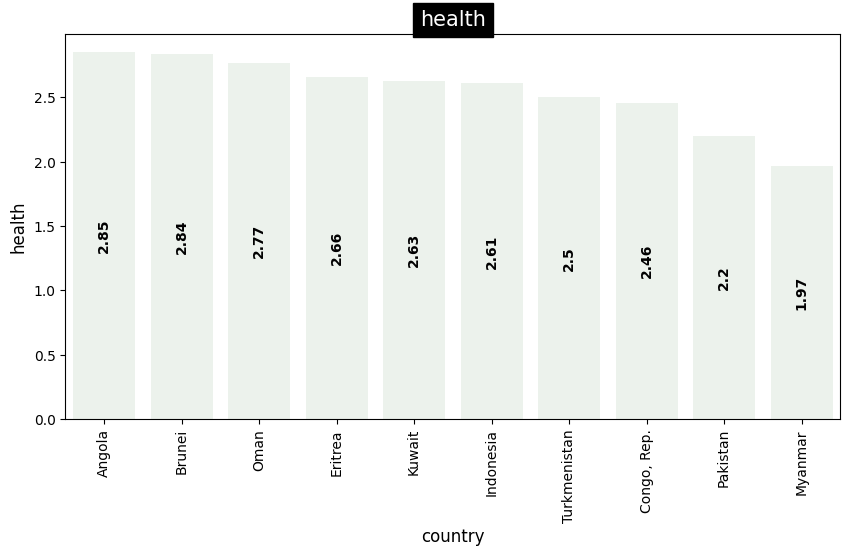

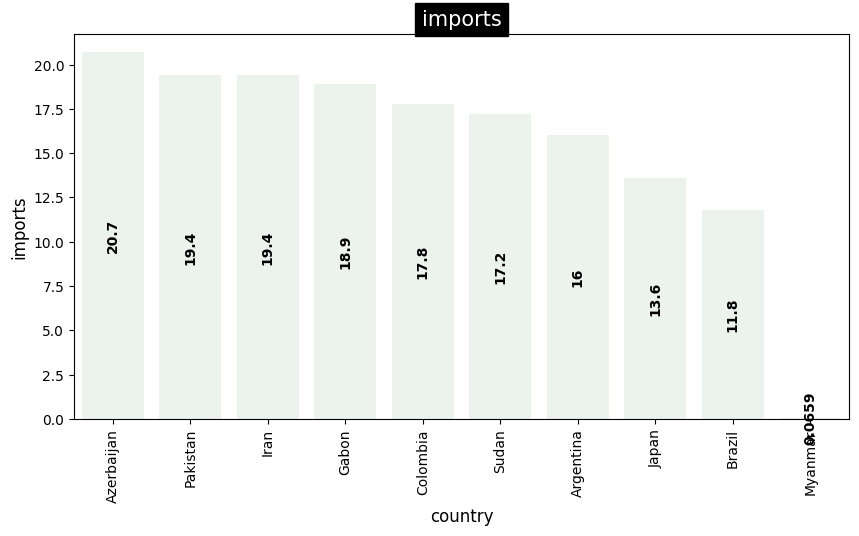

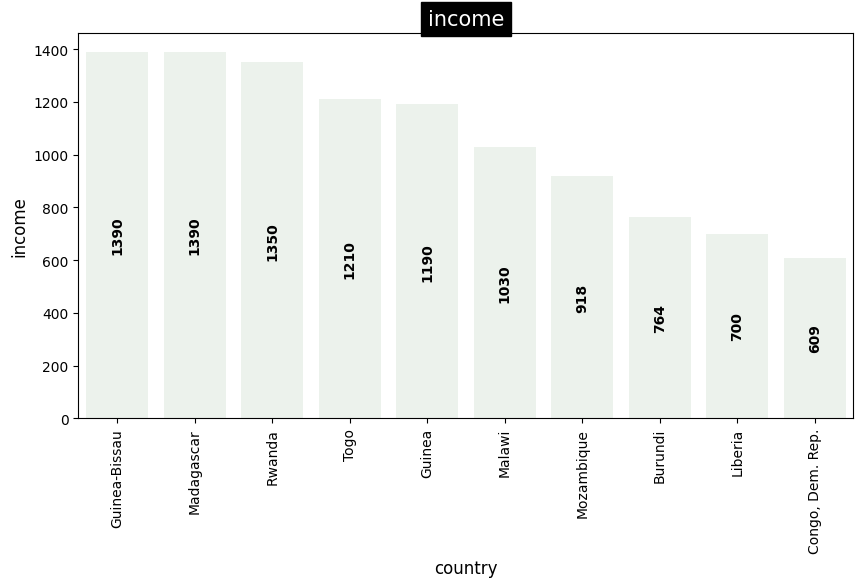

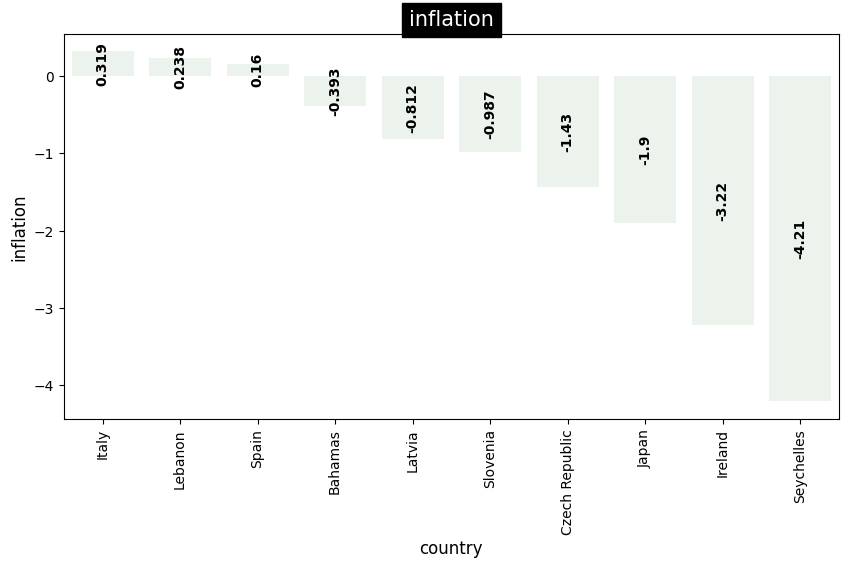

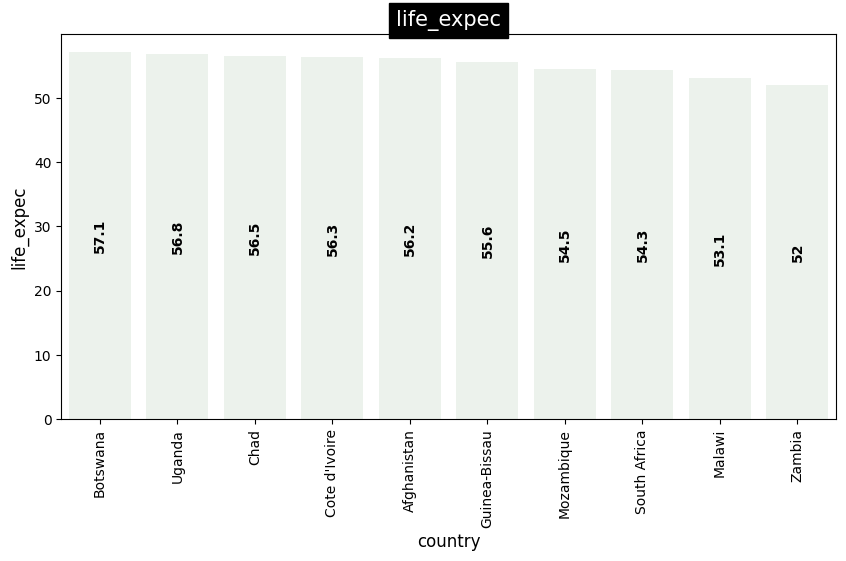

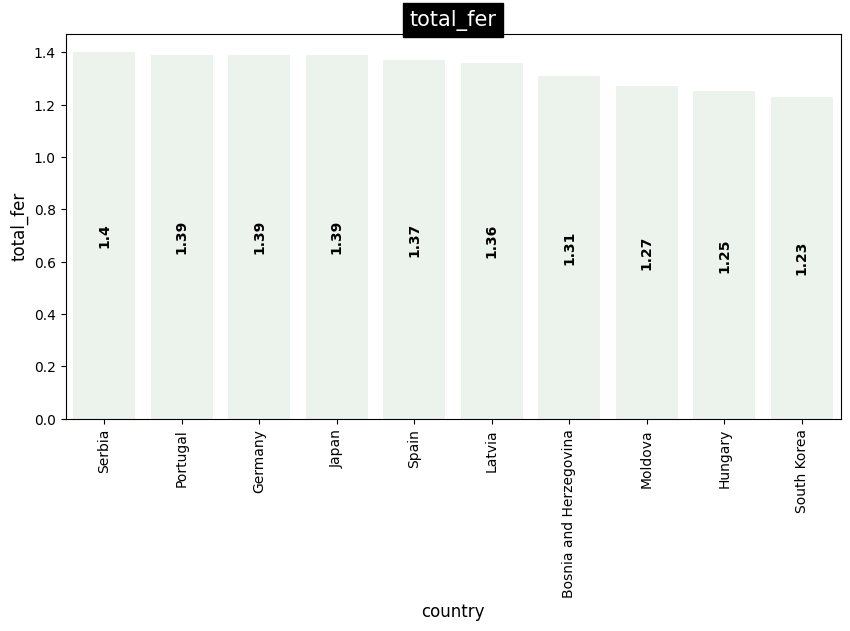

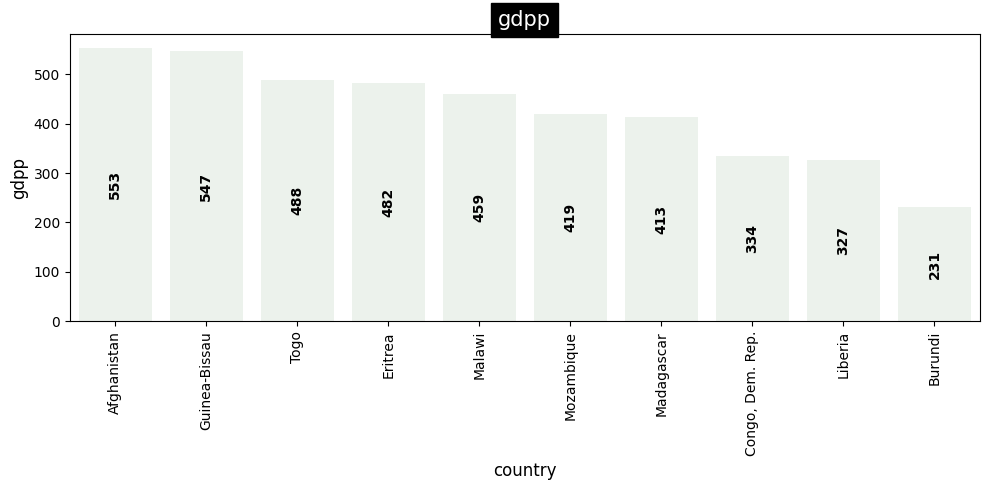

In [20]:
# last 10
for i in numerical_name :
    plt.figure(figsize=(10,5))
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel('country', size = 12)
    plt.ylabel(i, size = 12)
    ax=sns.barplot(x = 'country',y = i, data = df.sort_values(ascending = False,by = i).iloc[-10:])
    plt.xticks(rotation=90) # ticks
    for i in ax.containers:
        i.datavalues
        ax.bar_label(i,fontweight='bold',color='black',label_type='center', rotation=90)

plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

plt.show()

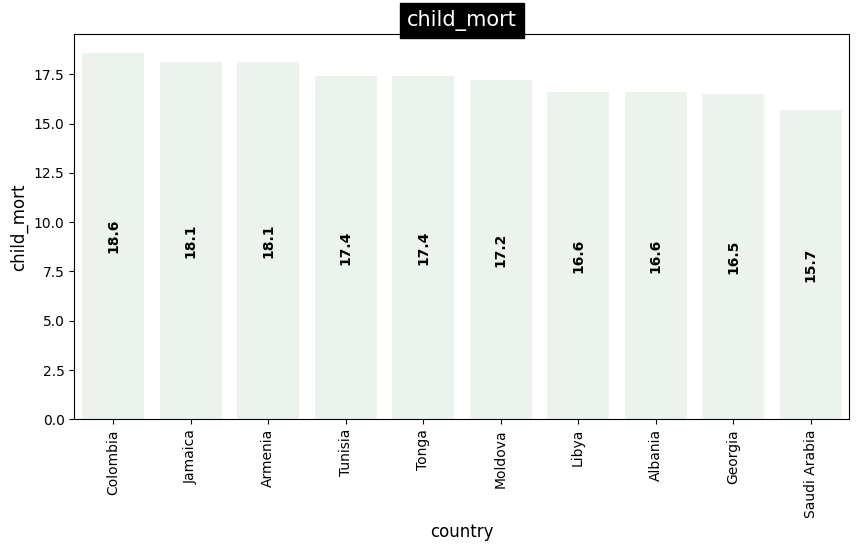

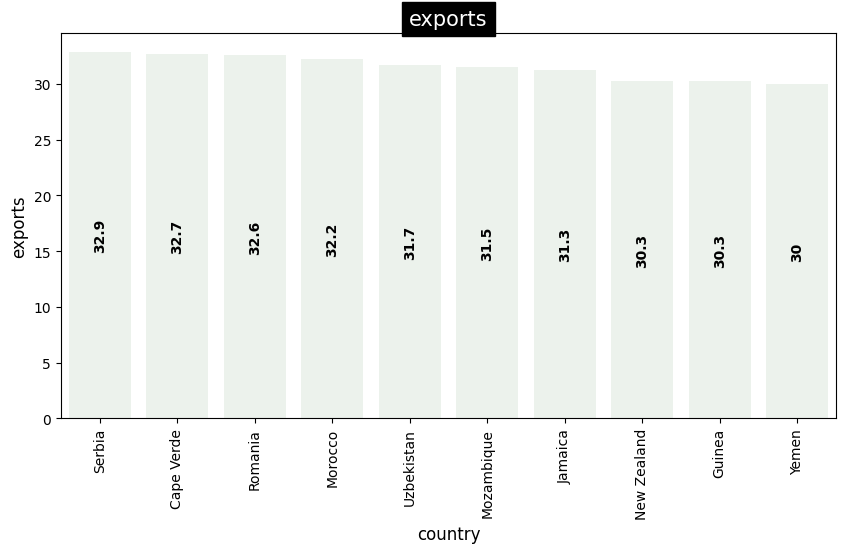

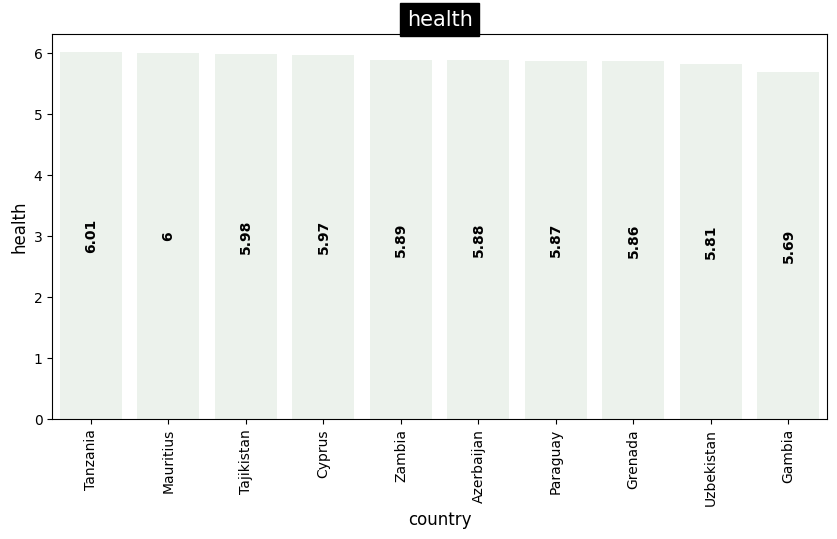

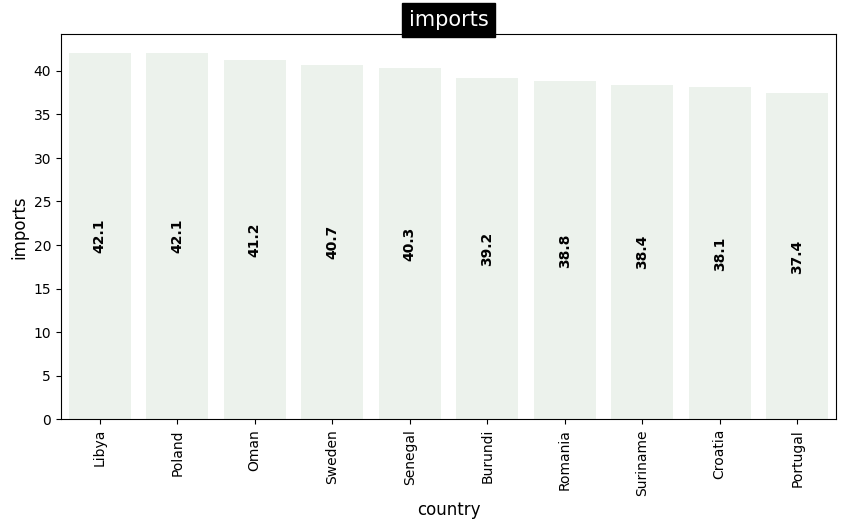

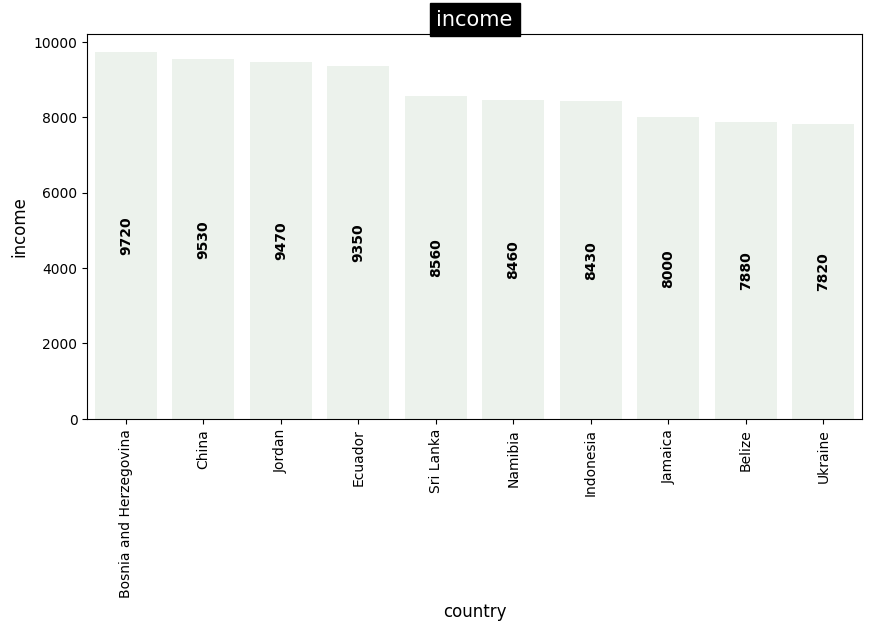

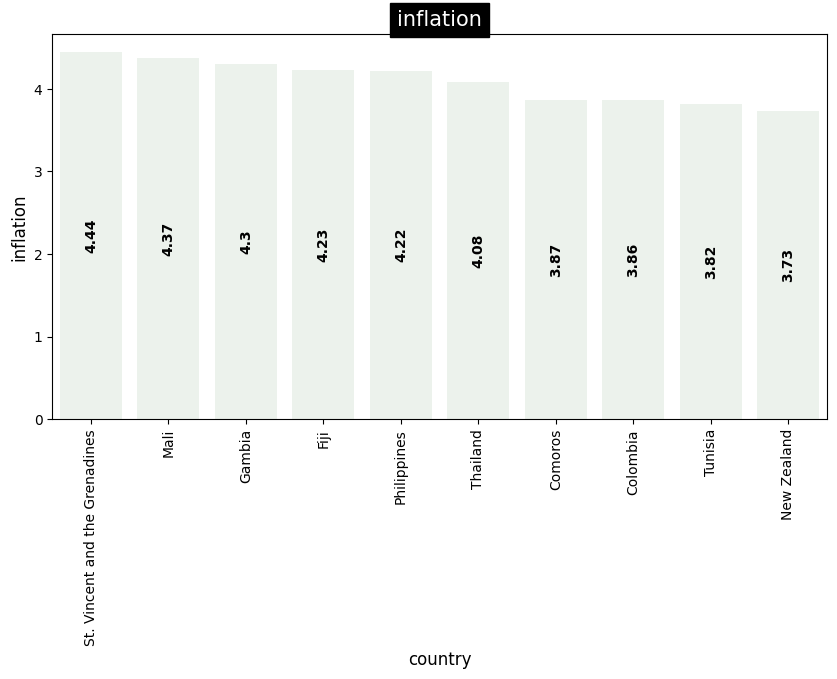

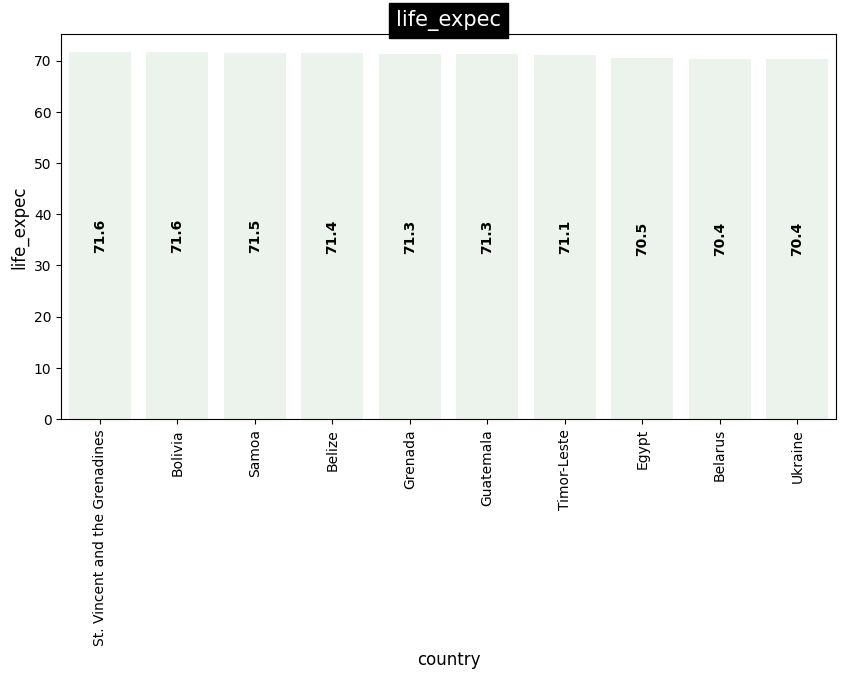

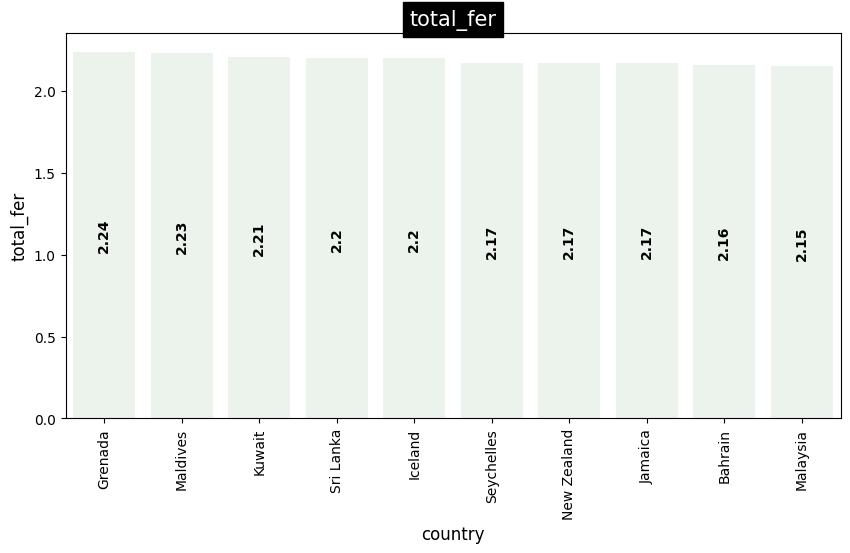

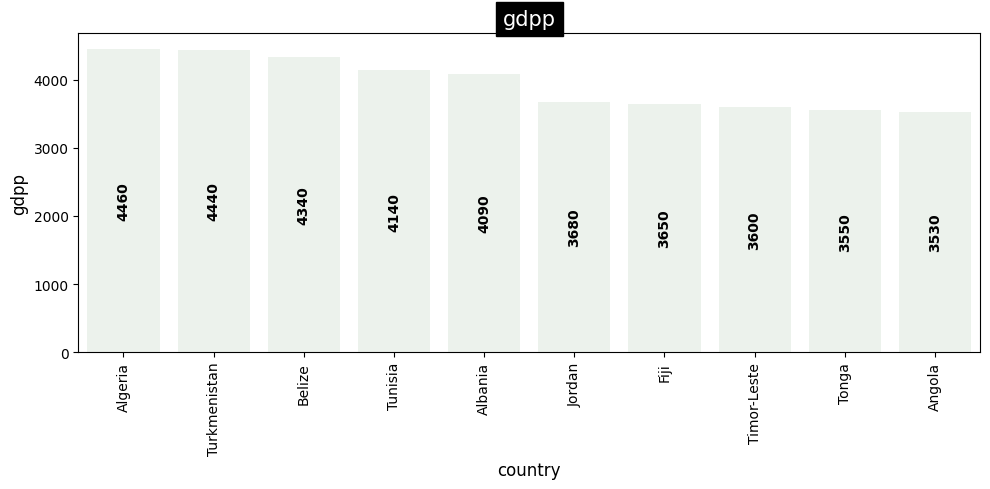

In [21]:
# middle 10
for i in numerical_name :
    plt.figure(figsize=(10,5))
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel('country', size = 12)
    plt.ylabel(i, size = 12)
    ax=sns.barplot(x = 'country',y = i, data = df.sort_values(ascending = False,by = i).iloc[80:90])
    plt.xticks(rotation=90) # ticks
    for i in ax.containers:
        i.datavalues
        ax.bar_label(i,fontweight='bold',color='black',label_type='center', rotation=90)

plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

plt.show()

In [33]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
df1 = df.drop(columns=['country'])
norm = scaler.fit_transform(df1)
norm_df = pd.DataFrame(norm,columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer' , 'gdpp'])

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(norm_df.values, i) for i in range(Numerical.shape[1])]
vif["Features"] = norm_df.columns
vif

VIF    Features
0  10.909988  child_mort
1  14.562708     exports
2   7.812413      health
3  17.223902     imports
4  15.822981      income
5   6.034165   inflation
6  11.672151  life_expec
7  13.520409   total_fer
8  12.688174        gdpp

In [35]:
#Creating a copy of data
ds = norm_df.copy()
#Scaling
scaler1 = StandardScaler()
scaler1.fit(ds)
scaled_ds = pd.DataFrame(scaler1.transform(ds),columns= ds.columns )

In [36]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=None)
pca_1.fit(scaled_ds)

PCA()

In [37]:
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  151.0 -8.822964e-18  2.070215 -4.045653 -1.577058  0.099485  1.424694   
col2  151.0 -2.352791e-17  1.242846 -2.802479 -0.926923 -0.086463  0.852846   

           max  
col1  4.404019  
col2  4.415674

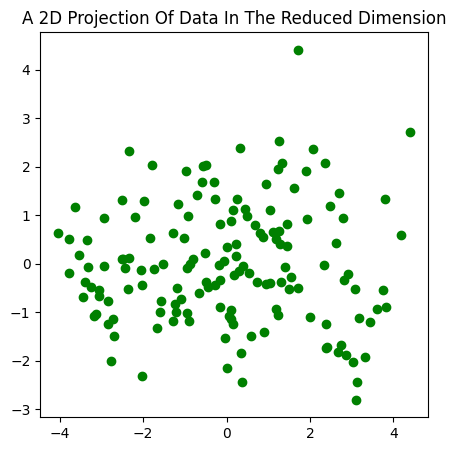

In [39]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]

#To plot
plt.figure(figsize = (5,5))
plt.scatter(x,y, c="green", marker="o" )
plt.title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

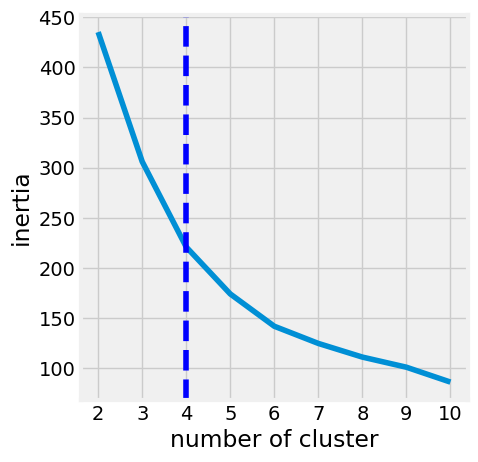

In [40]:
kmeans_set = {'init':'random', 'n_init':10,'max_iter':300, 'random_state':42}

list =[]
for k in range(2,11):
    kmeans =  KMeans(n_clusters=k, **kmeans_set)  # ** open dictionary
    kmeans.fit(PCA_ds)
    list.append(kmeans.inertia_)


from kneed import KneeLocator
k1 = KneeLocator(range(2,11),list , curve = 'convex' , direction ='decreasing')
plt.figure(figsize = (5,5))
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),list)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.axvline(x=4 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.show()

In [41]:
 from kneed import KneeLocator

In [42]:
k1.elbow

5

In [43]:
# evaluation
silhouette_coefficients = []
calinski_harabasz = []
davies_bouldin = []

for k in range(2,11):
    kmeans = KMeans (n_clusters = k, **kmeans_set)
    kmeans.fit(PCA_ds)
    score1 = silhouette_score(PCA_ds, kmeans.labels_)
    score2 = calinski_harabasz_score(PCA_ds, kmeans.labels_)
    score3 = davies_bouldin_score(PCA_ds, kmeans.labels_)

    silhouette_coefficients.append(score1)
    calinski_harabasz.append(score2)
    davies_bouldin.append(score3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.44458236  0.39854614]
 [-2.38125505 -0.23556292]
 [ 2.99222866 -0.64106541]]


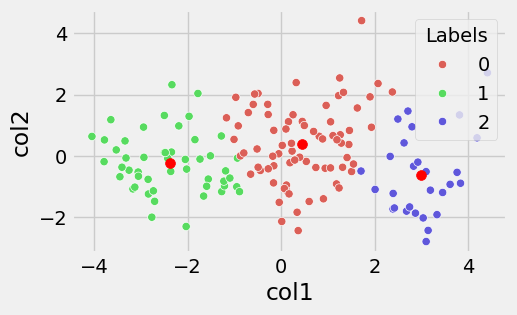

In [44]:
kmeans = KMeans(n_clusters = 3).fit(PCA_ds)
centroids = kmeans.cluster_centers_
print(centroids)
PCA_ds['Labels'] = kmeans.labels_
plt.figure(figsize = (5,3))
sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=PCA_ds['Labels'],palette=sns.color_palette('hls', 3))

plt.scatter(centroids[:,0], centroids[:,1] , c= 'red', s=50)
plt.show()

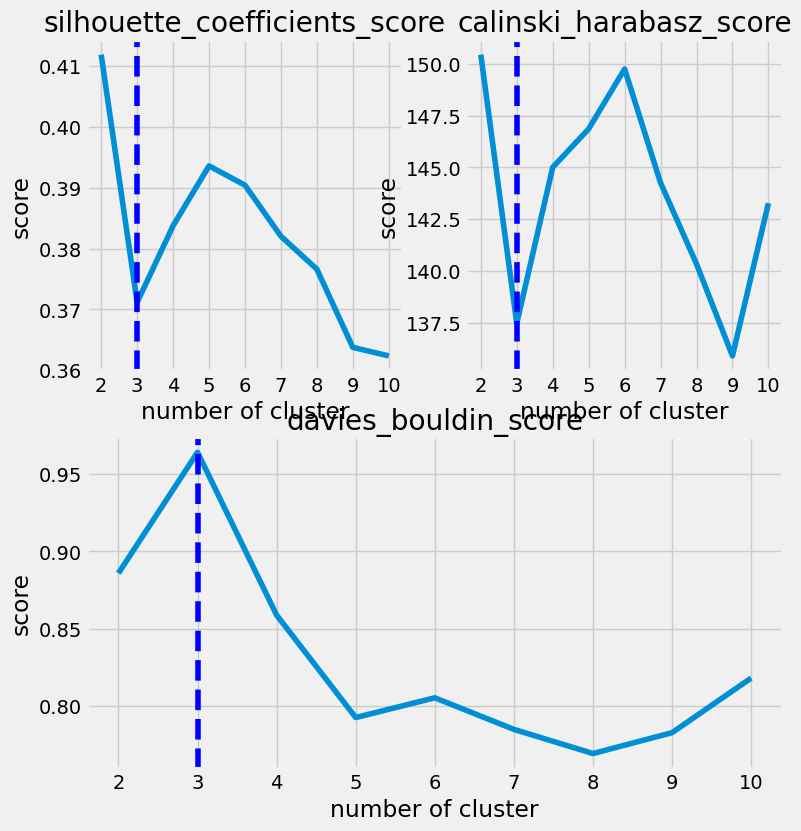

In [47]:
# evaluation plot
plt.figure(figsize = (8,9))

plt.subplot(221)
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('silhouette_coefficients_score')

plt.subplot(222)
plt.plot(range(2,11),calinski_harabasz)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('calinski_harabasz_score')

plt.subplot(212)
plt.plot(range(2,11),davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('davies_bouldin_score')

plt.show()

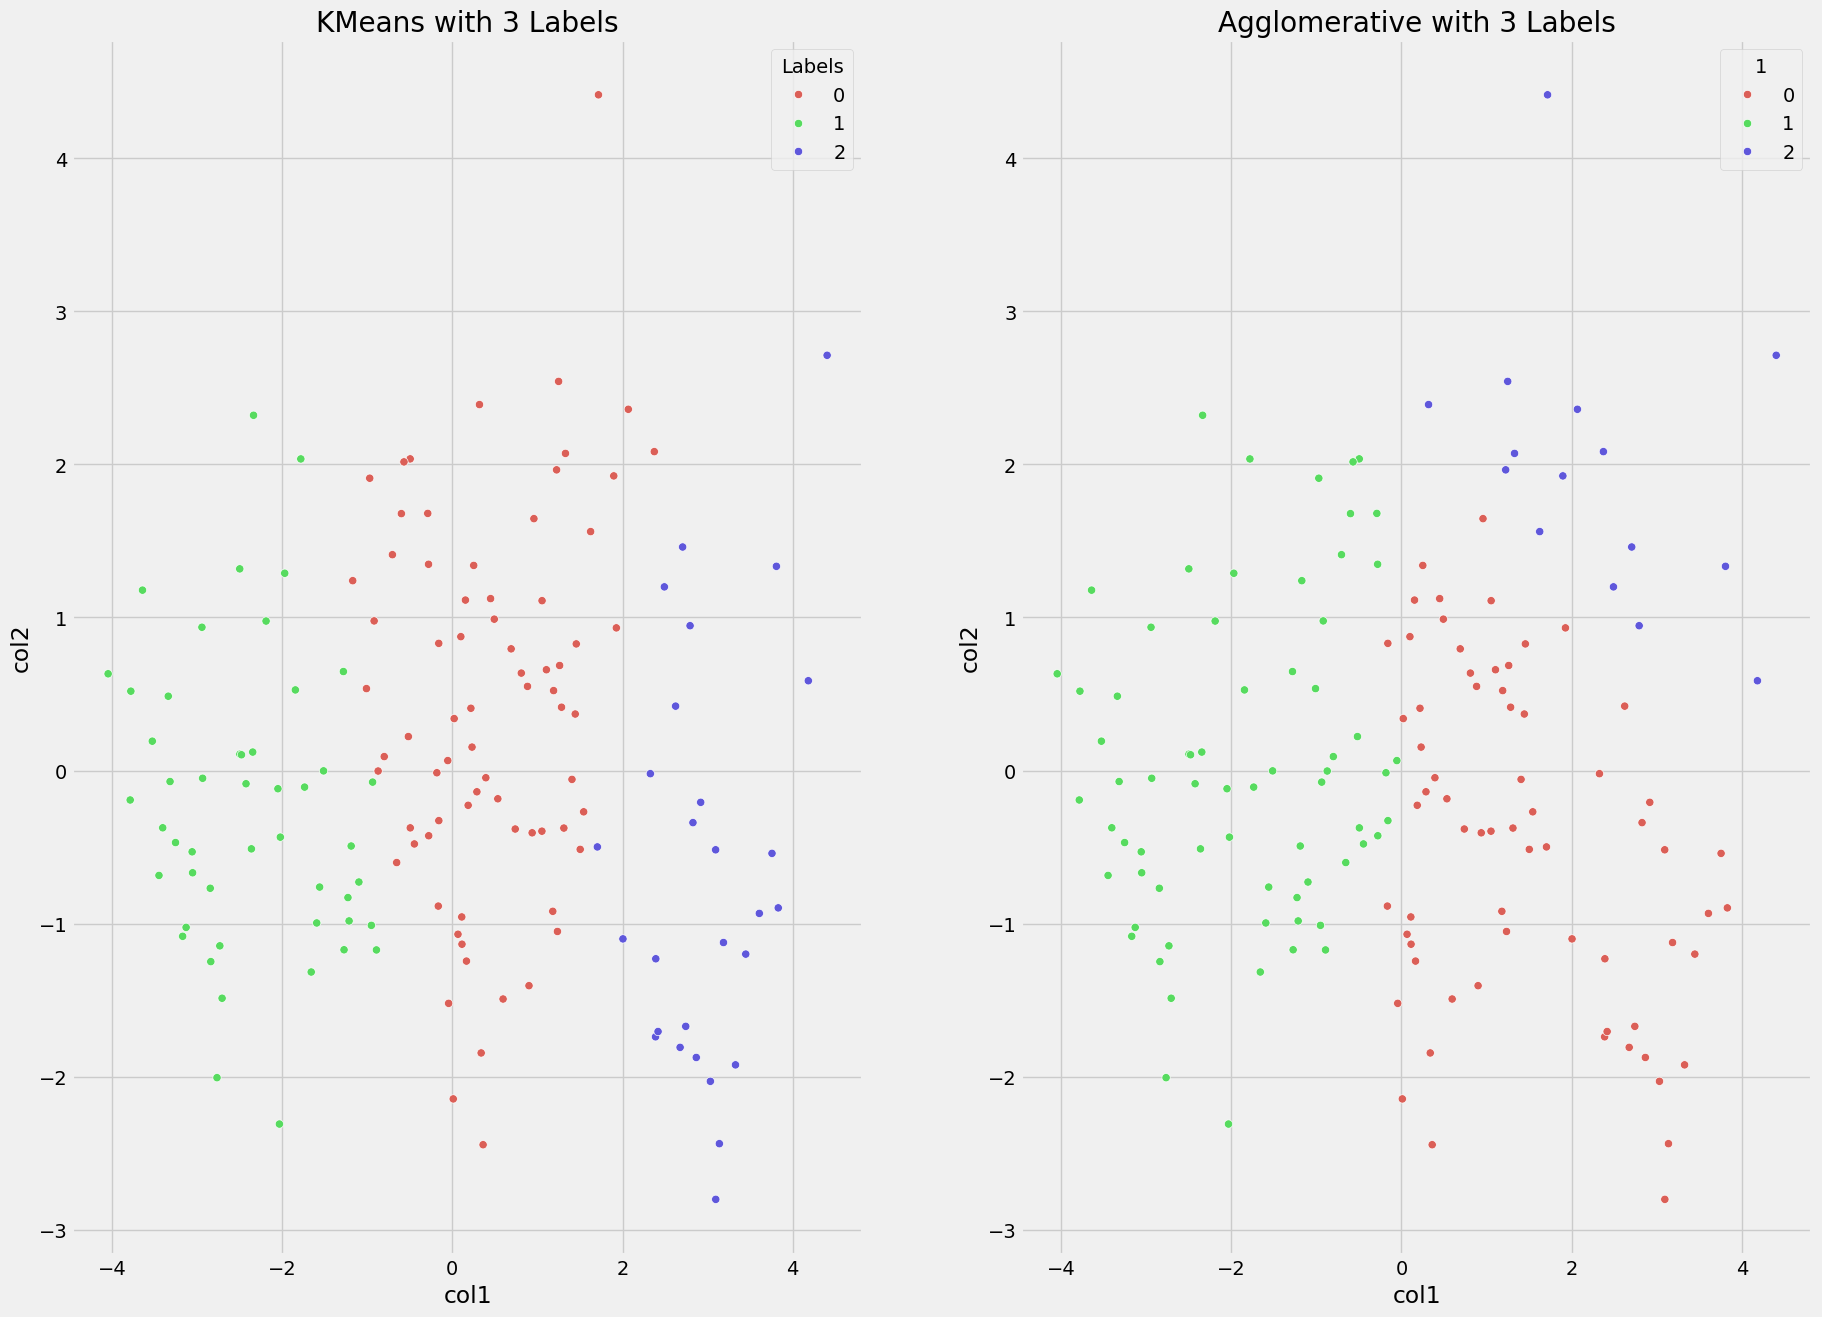

In [52]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(121)

sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=PCA_ds["Labels"],
                palette=sns.color_palette('hls', 3))
ax.set_title('KMeans with 3 Labels')


##### Agglomerative Clustering #####
ax = fig.add_subplot(122)

sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=AGG1.T[1],
                palette=sns.color_palette('hls', 3))
ax.set_title('Agglomerative with 3 Labels')



plt.show()